## Details:
* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.figure_factory as ff
import datetime as dt
import pandas as pd
import numpy as np

C:\Users\MichaelM\AppData\Local\Temp\ipykernel_14724\2241775348.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\MichaelM\AppData\Local\Temp\ipykernel_14724\2241775348.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Univariate Analysis

In [2]:
df = pd.read_csv(r'D:\data science diploma\assignments\avocado visualziation 1\avocado.csv', index_col=0)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


## Univariate Analysis

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int32         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), object(2)
memory usage: 1.9+ MB


In [ ]:
# Q1: check distribution of average price during Jan 2018
df_jan_2018 = df[(df['year'] == 2018) & (df['month'] == 1)]
fig=px.histogram(df_jan_2018, x='AveragePrice', title='Distribution of Average Price - Jan 2018')
fig.update_layout(
    title=dict(x=.5,font=dict(color='red'))   
)
fig.show()


In [45]:
# Q2: using diffrent chart than you used in the previous one, plot the distribution for Jan 2018 Average price
AveragePrice_data=df_jan_2018['AveragePrice'].to_list()
ff.create_distplot([AveragePrice_data],['AveragePrice'],show_hist=False)





In [ ]:
# Q3: Create box-plot for the Average price, but this time for all the dataset, and comment your conclusion
 
px.box(df,x='AveragePrice')
# The box plot indicates that the average price of avocados has a median around 1.37, with a range of prices from approximately 1.1 to 1.66.
# it  is right skewed distribution.
# The presence of outliers above $2.51 indicates occasional spikes in pricing 




# Bi/Multivariate

In [52]:
# Q4: Create a tracing boxplots (multiple box-plots in one figure) that shows the 
    # average price for each month and colored by year to distnguish between them
fig = px.box(df, x='month', y='AveragePrice', color='year', title='Average Price by Month and Year')
fig.update_layout(
    title=dict(x=.5,font=dict(color='red')),
    xaxis_title='Month',
    yaxis_title='Average Price'
)
fig.update_xaxes(
    tickmode='linear',
    tick0=1,         
    dtick=1,         
       
)

fig.show()

In [59]:
# Q5 : Create a joint plot, Average price on x axis and Total bags on y axis
px.scatter(df, x='AveragePrice', y='Total Bags', title='Joint Plot of Average Price vs Total Bags')


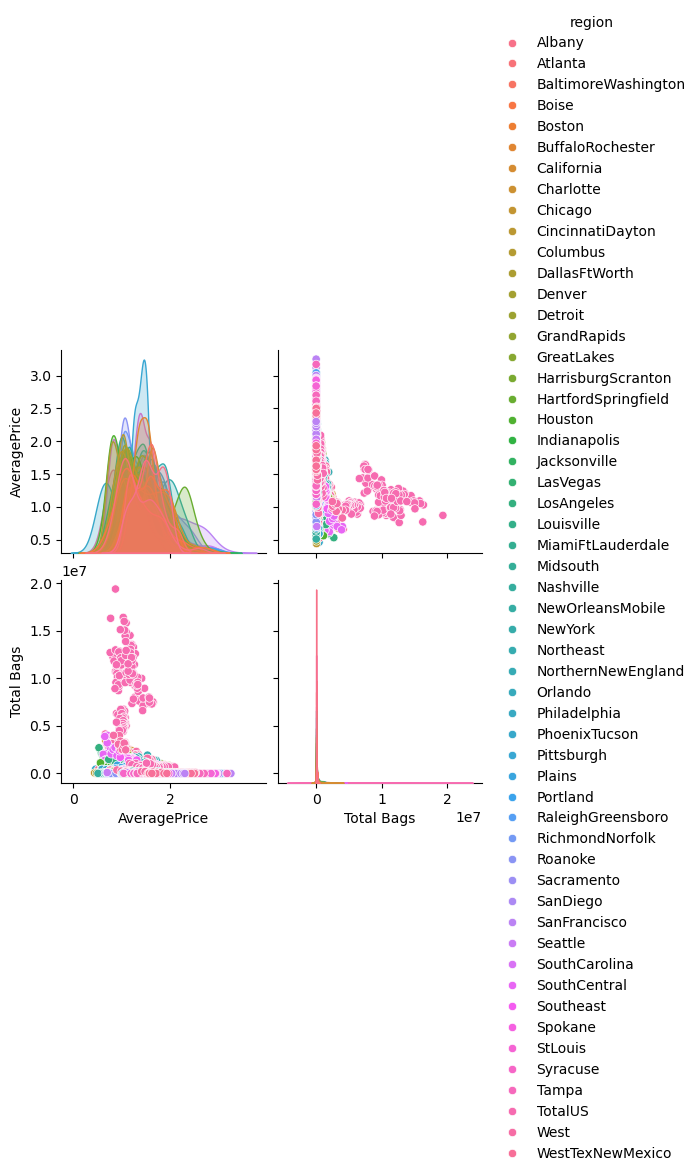

In [62]:
# Q6 : Create pair plot for 'AveragePrice', 'Total Bags' and 'region' features
import seaborn as sns
sns.pairplot(df, vars=['AveragePrice', 'Total Bags'], hue='region')



In [67]:
# Q7 : Create multiple line plots to compare between Average Price for each month for each year.
fig = px.line(df, x='month', y='AveragePrice', color='year', title='Average Price by Month for Each Year')
fig.update_layout(
    title=dict(x=.5,font=dict(color='red')),
    xaxis_title='Month',
    yaxis_title='Average Price'
)
fig.update_xaxes(
    tick0=1,
    dtick=1,
    range=[1, 12]
)
fig.show()


<Axes: xlabel='year', ylabel='AveragePrice'>

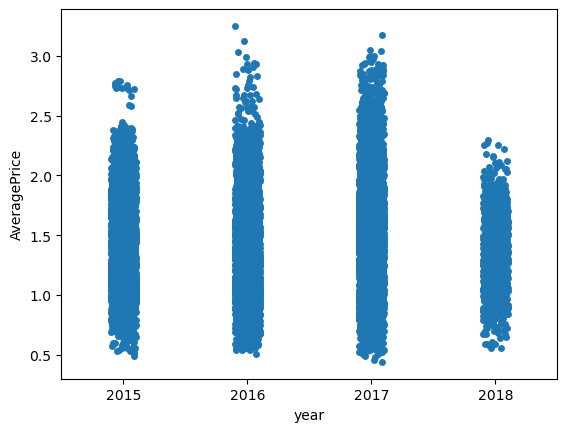

In [68]:
# Q8 : Create a strip plot to reflect Average Price for diffrent years.
sns.stripplot(data=df, x='year', y='AveragePrice', )


In [75]:
# Q9 : Create bar chart group for each year, reflects Average Price in each month 
px.bar(df, x='month', y='AveragePrice', color='year',barmode='group', title='Average Price by Month for Each Year')
       
    




In [82]:
# Q10 reflect the volume as well as the Average Price for each region during all months in diffrent years 
px.bar(df, x='month', y='Total Volume', color='region', facet_col='year', barmode='group',title='total volume by Month and Region for Each Year',  )
